In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from tqdm import tqdm

# オリーブオイルと組み合わせが良い（よく使われる）食材を知る

### 最初にオリーブオイルを使ったレシピのつくレポ数の分布を描画する

In [2]:
year = []
for i in range(1998, 2015):
    year.append(i)

col_names_ingredient = ["recipe_id", "ingredient"]
col_names_report = ["recipe_id"]

reportファイルも年別に分けて分析してたけど、つくレポは年またぐこと全然ありえることにやっと気がついた

In [3]:
# reportファイルを読み込む
report = pd.DataFrame(columns=["recipe_id"])

for i in year:
    report_temp = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/report 2/report{i}.csv",
                              names=col_names_report, usecols=[0])

    report = pd.concat([report, report_temp])

vc = report['recipe_id'].value_counts()

In [4]:
qty = []
bar = tqdm(total=len(year)*2)
for i in year:
    
    # ingredientファイルを読み込む
    ingredient = pd.read_csv(f"/Users/tamuramasayuki/Desktop/3S/基礎プロジェクトB/programming/dataset/ingredient/ingredient{i}.csv",
                                      names=col_names_ingredient, usecols=[0, 1])

    
    # ingredientからオリーブオイルの行だけ抽出する
    ingredient_oliveoil = ingredient[ingredient["ingredient"].isin(["オリーブオイル", "オリーブ油", "おりーぶおいる"])]
    df = ingredient_oliveoil.assign(report_qty=0)
    
    bar.update(1)
    
    
    # dfはオリーブオイルを使ったレシピのidなので、つくレポ数を結びつける
    for j in range(len(df)):
        try:
            df["report_qty"].iloc[j] = vc[df["recipe_id"].iloc[j]]
        except:
            continue

    qty = np.append(qty, df.loc[:, "report_qty"].values)
        
    bar.update(1)

  6%|▌         | 2/34 [00:00<00:06,  4.59it/s]/Users/tamuramasayuki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 34/34 [00:23<00:00,  1.53s/it]

↑プログレスバー全然いうこと聞いてくれん...

Text(0.5, 1.0, 'Report Quantity Distribution')

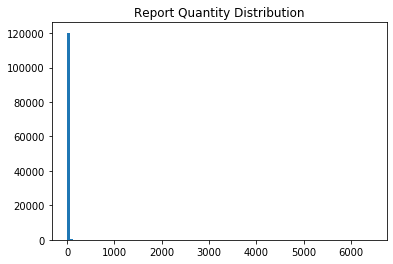

In [5]:
plt.hist(qty, bins=100)
plt.title("Report Quantity Distribution")

分布が偏りすぎて分布が見にくいので、つくレポ数が100より大きいレシピだけで分布を描画する

Text(0.5, 1.0, 'above 100')

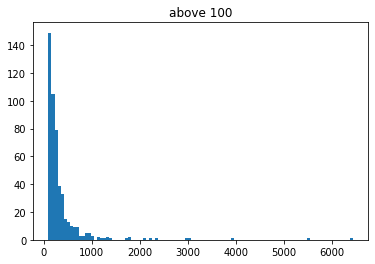

In [6]:
qty_above100 = []
for i in range(len(qty)):
    if qty[i] > 100:
        qty_above100.append(qty[i])
plt.hist(qty_above100, bins=100)
plt.title("above 100")

## オリーブオイルにあう材料を抽出する

本当はingredientのカタカナとひらがなを統一したり、記号を削除したりしたかったが諦めた

In [6]:
oliveoil_id = ingredient_oliveoil.drop(["ingredient"], axis=1)

In [7]:
df_i = pd.merge(ingredient, oliveoil_id, on="recipe_id", how="right")

In [8]:
df_i.head()

,recipe_id,ingredient
0,04324210352066234d6eb43866b34695cb541d31,鮭
1,04324210352066234d6eb43866b34695cb541d31,たまねぎ
2,04324210352066234d6eb43866b34695cb541d31,しめじ
3,04324210352066234d6eb43866b34695cb541d31,白ワイン
4,04324210352066234d6eb43866b34695cb541d31,オリーブオイル


In [9]:
print(len(ingredient), len(df_i))

12684461 1098060


In [10]:
df_i.drop(["recipe_id"], axis=1, inplace=True)

In [11]:
df_i = df_i[~df_i["ingredient"].isin(["オリーブオイル", "オリーブ油", "おりーぶおいる"])]

In [12]:
df_i.head()

,ingredient
0,鮭
1,たまねぎ
2,しめじ
3,白ワイン
5,ハーブ


In [21]:
df_i["ingredient"].value_counts()[:59]

塩           38624
にんにく        26102
玉ねぎ         20942
水           13726
塩コショウ       12987
パスタ         12760
トマト         12451
ニンニク        12136
ベーコン        10453
バター          9514
砂糖           9345
白ワイン         9007
醤油           7897
牛乳           7632
卵            7465
小麦粉          6138
レモン汁         5667
しめじ          5504
コンソメ         5403
粉チーズ         5328
じゃがいも        5325
ブラックペッパー     5283
人参           5185
パセリ          5110
ピーマン         5075
こしょう         4944
鷹の爪          4693
キャベツ         4691
たまねぎ         4659
マヨネーズ        4654
ケチャップ        4579
胡椒           4572
にんじん         4300
生クリーム        4270
塩・こしょう       4265
バジル          4190
薄力粉          3841
塩こしょう        3795
ローリエ         3778
ズッキーニ        3745
コショウ         3559
強力粉          3506
酒            3422
パルメザンチーズ     3370
トマト缶         3271
酢            3254
ブロッコリー       3208
セロリ          3181
しょうゆ         3176
エリンギ         3058
なす           2970
塩・胡椒         2949
パン粉          2939
プチトマト        2934
クレイジーソルト     2897
ミニトマト     

In [ ]:
text = re.sub('✴️・●-☆・＊■★?！＃＄％＆１２３４５|（[^）]*）', '', text)

In [169]:
df.to_csv('ingredients_with_oliveoil.csv', header=False, index=False)